In [27]:
from collections import defaultdict
import argparse

import numpy as np
import pandas as pd

from collections import Counter
from Bio import SeqIO
import networkx as nx

import matplotlib.pyplot as plt

In [32]:
seq_list = []
k_length = 20

fasta = ["HIV1.fasta"]

for seqq in fasta:
    seq_list = seq_list + [(str(a.id),str(a.seq)) for a in list(SeqIO.parse(seqq, "fasta"))]
    
seq_df = pd.DataFrame(seq_list)
#seq_df = pd.DataFrame(seq_list).head()
seq_df.columns = ["name","Sequence"]

In [33]:
name_dict = list(enumerate(seq_df["name"]))

In [34]:
kmer_pos_dict = defaultdict(list)
kmer_name_dict = defaultdict(list)
kmer_pos_dict = defaultdict(list)
kmer_dict = set()
for i in range(len(seq_df)):
    name = i
    seq = seq_df.loc[i,"Sequence"]
    for j in range(len(seq)-k_length+1):
        kmer_dict.add(seq[j:j+k_length])
#     print(i,seq[j:j+k_length])
kmer_list = dict(zip(sorted(list(kmer_dict)), list(range(0,len(kmer_dict)))))

edges = defaultdict(list)
for i in range(len(seq_df)):
    name = i
    seq = seq_df.loc[i,"Sequence"]
    for j in range(len(seq)-k_length*2):
        edges[kmer_list[seq[j:j+k_length]]].append(kmer_list[seq[j+1:j+k_length+1]])
        kmer_name_dict[kmer_list[seq[j:j+k_length]]].append(name)
        kmer_pos_dict[kmer_list[seq[j:j+k_length]]].append(j)
#     print(name)
    kmer_name_dict[kmer_list[seq[len(seq)-k_length:]]].append(name)
    kmer_pos_dict[kmer_list[seq[len(seq)-k_length:]]].append(j)

In [35]:
G = nx.DiGraph()

print("Number of nodes: ",len(kmer_list))
num = 0
for j in edges:
    for i in edges[j]:
        G.add_edge(j,i)
        num+=1
print("Number of edges: ",num)

Number of nodes:  194595
Number of edges:  348524


In [36]:
kmer_appear_times = defaultdict()
for i in kmer_pos_dict:
    times = len(kmer_pos_dict[i])
    for j in kmer_pos_dict[i]:
        kmer_appear_times[j] = times

In [48]:
windowsize=100
kmer_appear_times_list = [[],[]]
i=0
while i < len(kmer_appear_times)-windowsize:
    kmer_appear_times_list[0].append(i)
    times = 0
    for j in range(0,windowsize):
        times += kmer_appear_times[i+j]
    kmer_appear_times_list[1].append(times)
    i = i + windowsize

Text(0, 0.5, 'number of appearance')

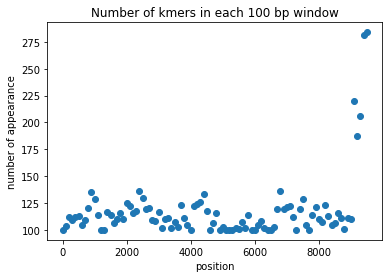

In [54]:
plt.title("Number of kmers in each 100 bp window")
plt.scatter(kmer_appear_times_list[0], kmer_appear_times_list[1])
plt.xlabel("position")
plt.ylabel("number of appearance")